# **1.Ai_pima_ANN.ipynb  **

**numpy**
numpy เป็น library ที่ช่วยให้เราจัดการกับอาเรย์หลายมิติได้โดยง่ายขึ้น

ภาษา Python ไม่มีข้อมูลชนิด array แต่สามารถใช้ list แทนได้ แต่หากใช้ numpy ก็จะทำให้ใช้ข้อมูลชนิด array ได้ และทำงานกับข้อมูลอาเรย์หลายมิติก็ได้โดยง่ายไปอีก

ข้อแตกต่างระหว่าง array กับ list คือ array จะต้องประกอบด้วยข้อมูลเพียงชนิดเดียวเท่านั้น เรามักเห็นเป็นตัวเลขหมด เพราะมักใช้ในการคำนวณใน Machine Learning

numpy จะสร้าง array สำหรับเก็บข้อมูล โดยใช้ pointer ตัวเดียวชี้ไปที่ array นั้น ซึ่งทำให้ numpy มีประสิทธิภาพสูงสำหรับการทำการจัดการข้อมูลลักษณะนี้

numpy ถูกติดตั้งมาพร้อมกับการติดตั้ง Pyhton แล้ว เราจึงเรียกใช้งานได้เลย

ถ้ายังไม่มีการติดตั้งมา ให้ติดตั้งโดยใช้คำสั่ง เช่น pip install numpy

**pandas**
ย่อมาจากคำว่า “panel data”
https://pypi.org/project/pandas/
ความสามารถของตัว pandas จัดการข้อมูลที่อยู่รูปแบบ tabular หรือในรูปแบบตาราง
pandas เป็น library ที่เสริมความสามารถของ numpy ให้มากขึ้น

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #ระวังเครื่องหมาย ‘ กับ ' ต่างกันนะคะ


# ข้อมูลต้องเป็นตัวเลขเท่านั้นในการคำนวณ ANN

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#dataset = pd.read_csv('pima.csv')
import io
from google.colab import files

uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['pima.csv']))

Saving pima.csv to pima.csv


In [ ]:
dataset.head(10)

,NT,Plasma glucose,DB pressure,TS Thickness,Serum,Boday mass index,Dp Function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
dataset.tail(5)

,NT,Plasma glucose,DB pressure,TS Thickness,Serum,Boday mass index,Dp Function,Age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.describe()      # ต้อง tranform data แปลงค่าให้มีค่าที่ไม่ห่างมากเกินไป

,NT,Plasma glucose,DB pressure,TS Thickness,Serum,Boday mass index,Dp Function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



** 1. Pandas iloc data selection**
see detail at [link text](https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/#iloc-selection)

In [ ]:
X = dataset.iloc[:, 0:8]   # ดึง record .iloc[:, 0:8] ส่วนตัวนี้คือ : การดึงทุก record ออกมา ส่วน 0:8 คือดึง columnb 1-8 มา
Y = dataset.iloc[:, 8]     # ดึง record .iloc[:, 8] ส่วนตัวนี้คือ : การดึงทุก record ออกมา ส่วนเลข 8 คือดึงเฉพาะ columnb 8 มา

# X เป็น Output

In [ ]:
X.head(5)   # มันจะตัด class ออกมา

,NT,Plasma glucose,DB pressure,TS Thickness,Serum,Boday mass index,Dp Function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
Y.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Class, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler  #แปลงข้อมูล (transform data)

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
from sklearn.model_selection import train_test_split      # ต้องมีการแปลง train test

We now split the input features and target variables into training dataset and test dataset. out test dataset will be 30% of our entire dataset.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape,X_test.shape

((614, 8), (154, 8))

In [ ]:
print(X_train)

[[ 0.93691372  0.91091809  0.45982725 ...  0.40708356  0.66479969
   1.76634642]
 [ 0.04601433 -0.74783062 -0.47073225 ... -0.48135115 -0.08720986
  -0.95646168]
 [-1.14185152  1.38037527  1.08020025 ...  2.57740266 -0.13553176
  -0.87137393]
 ...
 [ 0.04601433 -0.84172205 -0.2122435  ... -0.92556851 -0.97814487
  -1.04154944]
 [ 2.12477957 -1.12339636  0.25303625 ... -0.24020459 -0.51908683
   0.14967911]
 [ 0.3429808   0.47275805  0.66661825 ... -4.06047387  0.50775352
   3.04266271]]


In [ ]:
print(Y_train)

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Class, Length: 614, dtype: int64


ปกติเราจะใช้ tensorflow.keras เพื่อโหลดชุดข้อมูลจาก .datasets, โครงสร้างโมเดลจาก .models, และโครงสร้างของ Layer ต่างๆ จาก .layers

**TensorFlow** เป็นไลบรารีสำหรับใช้พัฒนา machine learning เป็น Open source (เขียนด้วย Python) ที่พัฒนาโดยกูเกิล โดยกูเกิลได้ปล่อย TensorFlow ซึ่งเป็นไลบรารีสำหรับใช้พัฒนา machine learning ที่ใช้งานกันในกูเกิลเอง ให้กลายเป็นโปรแกรม Open source (ใช้ Apache 2.0 สามารถนำไปใช้เพื่อการค้าได้)

**Keras** คือ deep learning framework สำหรับ python ที่ทำให้วิธีของเทรน โมเดลได้ง่าย
ดังนั้น Keras เป็น Deep Learning API ของ TensorFlow 2.0 ที่ใช้สำหรับการทดลองที่ง่ายและรวดเร็ว เป็นเรื่องง่ายที่จะเข้าใจยืดหยุ่นในการขยายและปรับใช้และมีประสิทธิภาพเพียงพอที่จะสร้างเครือข่ายประสาทเทียมใด ๆ



In [ ]:
pip install keras

In [ ]:
pip install tensorflow


**sequential** is a linear stack of layers. คือให้ model run ในแต่ละ layer แบบ sequential

**Dense** ในที่นี้หมายถึงโครงสร้างแบบ fully connected ระหว่างชั้นที่ติดกัน โดยเราเลือกใช้ activation function ซึ่งมีหลายวิธีด้วยกัน เช่น  tanh, ReLU, Sigmoid

**Activate** คือ การกำหนด activate function  เพื่อเลือกรูปแบบของสมการ (เส้น) ในการแบ่งแยกคลาส

In [ ]:
from keras import Sequential
from keras.layers import Dense

# Sigmoid function
Activation Function ที่เป็นที่นิยมในอดีต คือ Sigmoid Function ที่รับข้อมูลอะไรก็ตามเข้าไป เปลี่ยนเป็นค่าระหว่าง 0-1

Sigmoid Function เป็นฟังก์ชันที่เป็น Curve รูปตัว S เห็นแล้วเข้าใจได้ง่าย และเนื่องจาก Output ของ Sigmoid Function มีค่าระหว่าง 0 – 1 จึงเหมาะที่จะถูกใช้ในงานที่ต้องการ Output เป็นความน่าจะเป็น (Probability) หรือใช้เป็น Output ว่า 1=Yes, 0=No

In [ ]:
classifier = Sequential()

#Input Layer and First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))    # Dense = Fully connected ( Fully Mesh )
# input_dim=8 input Layer จะมี node 8 ตัว


#Second Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#output = activation(dot(input, kernel) + bias)

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Optimization Algorithm** คืออะไร ?
ปกติแล้วถ้าเราใช้ machine learning ตัวไหนก็ตาม มันคือการใช้หลักคณิตศาสตร์ในการแบ่งกลุ่ม ตาม training set ที่เราใช้ฝึกฝน เมื่อฝึกเสร็จแล้วก็จบ นำไปใช้งานได้เลยแต่ว่าใน Deep Learning เนี่ยระหว่างที่ฝึกฝนตัว neuron ก็จะปรับปรุงค่า error และ loss ได้ด้วย เพื่อให้ได้ค่าที่ดีที่สุด โดยจะต้องใช้สิ่งที่เรียกว่า Optimization โดยสิ่งนี้จะทำการเปลี่ยนแปลงค่า น้ำหนัก (Weight) และค่า Bias ที่เชื่อมกับ neuron นั้นเอง

To optimize our neural network we use Adam. Adam stands for Adaptive moment estimation. Adam is a combination of RMSProp + Momentum.
Momentum takes the past gradients into account in order to smooth out the gradient descent.
we use accuracy as the metrics to measure the performance of the model
https://keras.io/api/losses/


In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

we now fit out training data to the model we created. we use a batch_size of 10. This implies that we use 10 samples per gradient update.
We iterate over 100 epochs to train the model. An epoch is an iteration over the entire data set.

**What is difference between epoch and batch size**

In the neural network terminology:

•	one epoch = one forward pass and one backward pass of all the training examples

•	batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

•	number of iterations = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.



In [ ]:
#Fitting the data to training dataset
#classifier.fit(X_train, Y_train, batch_size=10, epochs=100)
history = classifier.fit(X_train, Y_train, batch_size=10, epochs=50, validation_data=(X_test, Y_test)) # เอาโมเดลมา train ตรงชุดนี้ X_train, Y_train, batch_size=10, epochs=50
#  ส่วนตรงนี้คือการทดสอบ epochs=50  ประมาณ 50 รอบ
#  validation_data=(X_test, Y_test) คือการ test dataset

# ดูผลการทดสอบดูตรงที่ accuracy: กับ val_accuracy:
# accuracy คือความถูกต้องของ train dataset ส่วน val_accuracy คือความถูกต้องของ test dataset
# ให้ดูตรงที่ ค่า accuracy

Epoch 1/50
62/62 [==============================] - 2s 8ms/step - loss: 0.6901 - accuracy: 0.6336 - val_loss: 0.6840 - val_accuracy: 0.6948
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.6401 - val_loss: 0.6676 - val_accuracy: 0.6948
Epoch 3/50
62/62 [==============================] - 0s 4ms/step - loss: 0.6623 - accuracy: 0.6401 - val_loss: 0.6321 - val_accuracy: 0.6948
Epoch 4/50
62/62 [==============================] - 0s 4ms/step - loss: 0.6239 - accuracy: 0.6661 - val_loss: 0.5729 - val_accuracy: 0.7857
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.7459 - val_loss: 0.5121 - val_accuracy: 0.7857
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.7671 - val_loss: 0.4713 - val_accuracy: 0.7857
Epoch 7/50
62/62 [==============================] - 0s 4ms/step - loss: 0.5047 - accuracy: 0.7655 - val_loss: 0.4485 - val_accuracy: 0.7922
Epoch 8/50
62/62 [==

In [ ]:
score = classifier.evaluate(X_train, Y_train, verbose = 0)
print('Train loss : ', score[0])
print('Train accuracy : ', score[1])

Train loss :  0.457905113697052
Train accuracy :  0.7882736325263977


In [ ]:
score1 = classifier.evaluate(X_test, Y_test, verbose = 0)
print('Test loss : ', score1[0])
print('Test accuracy : ', score1[1])

Test loss :  0.433563768863678
Test accuracy :  0.7922077775001526


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


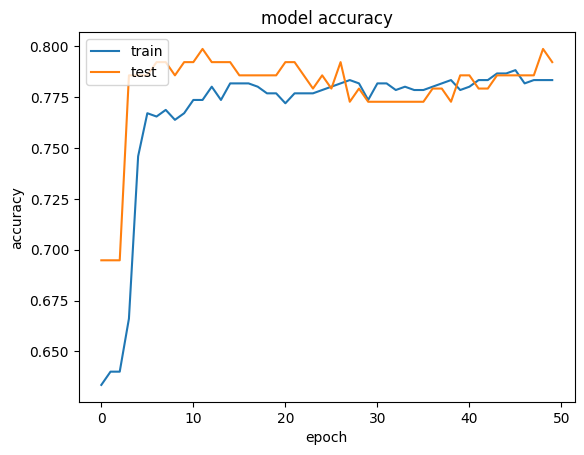

In [ ]:
import matplotlib.pyplot as plt # For graphical representation
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# การวิเคราะห์ประสิทธิภาพ Machine Learning Model ด้วย Learning Curve
https://blog.pjjop.org/diagnose-machine-learning-model-performance-with-learning-curves/

#Save Model

In [ ]:
classifier.save("pima_model.h5")
print("Saved model.")

Saved model.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)

5/5 [==============================] - 0s 3ms/step


In [ ]:
print(X_test)

[[-0.84488505  2.44447821  0.35643175 ...  1.38436175  2.784923
  -0.95646168]
 [-0.54791859 -0.43485916  0.25303625 ...  0.20401277 -0.20499449
  -0.87137393]
 [ 0.04601433 -1.40507067 -0.36733675 ...  0.25478047 -0.24425603
  -0.70119842]
 ...
 [ 0.04601433  0.66054092  0.87340925 ...  1.52397292  0.52285411
  -0.95646168]
 [-0.25095213 -0.15318486  0.25303625 ... -0.72249772 -1.10196973
  -0.78628618]
 [-0.84488505 -0.43485916  0.14964075 ... -0.15136112  1.054395
  -0.78628618]]


In [ ]:
print(Y_pred)

[[ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

print(cm)

[[93 14]
 [18 29]]


#Load Model

In [ ]:
from numpy import loadtxt
from keras.models import load_model

#load model
model = load_model('pima_model.h5')

#summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Model with Unseen data
As the warning suggest, please use instead:

**np.argmax(model.predict(x), axis=-1)**, if your model does multi-class classification (e.g. if it uses a **softmax **last-layer activation).
**(model.predict(x) > 0.5).astype("int32")**, if your model does binary classification (e.g. if it uses a **sigmoid **last-layer activation).

In [ ]:
uploaded = files.upload()
udata = pd.read_csv(io.BytesIO(uploaded['my_unseen_pima.csv']))
print(udata)
X_new = udata.iloc[:, 0:8]



KeyboardInterrupt: 

In [ ]:
sc = StandardScaler()
X_new = sc.fit_transform(X_new)


In [ ]:
predict_x=model.predict(X_new)
print(predict_x)

In [ ]:
#classes_x=np.argmax(predict_x,axis=-1)
classes_x = (predict_x > 0.5).astype("int32")

for i in range(len(classes_x)):
  print("The label of unsenn data is ", predict_x[i], '\t', classes_x[i])

**Exercise**
ให้ทดลองจำแนกข้อมูลด้วย Neural network   กับชุดข้อมูล iris  โดยแบ่ง  ชุดข้อมูลทดสอบเป็น  80:20
และ batch size  = 10  epoch  =  100

•	ค่า  accuracy เท่ากับเท่าไหร่

•	จงวาด confusion matrix ของการจำแนก  และ plot graph แสดงการเปรียบเทียบระหว่างการเรียนรู้กับการทดสอบ


In [ ]:
import io
from google.colab import files

uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

Saving iris.csv to iris.csv


In [ ]:
dataset.head(10)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
dataset.tail(10)

,sepallength,sepalwidth,petallength,petalwidth,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
dataset.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from keras import Sequential
from keras.layers import Dense

X = dataset.iloc[:, 0:4]
Y = dataset.iloc[:, 4]

In [ ]:
X.head(10)

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [1]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y = to_categorical(Y)

NameError: name 'Y' is not defined

In [ ]:
print(Y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape,X_test.shape

((120, 4), (30, 4))

In [ ]:
print(Y_train)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1.

In [ ]:
classifier = Sequential()

#Input Layer and First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=4))    # Dense = Fully connected ( Fully Mesh )
# input_dim=8 input Layer จะมี node 8 ตัว


#Second Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(3, activation='softmax', kernel_initializer='random_normal'))
#output = activation(dot(input, kernel) + bias)

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
Total params: 55 (220.00 Byte)
Trainable params: 55 (220.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = classifier.fit(X_train, Y_train, batch_size=10, epochs=100, validation_data=(X_test, Y_test)) # เอาโมเดลมา train ตรงชุดนี้ X_train, Y_train, batch_size=10, epochs=50

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 0.5445 - accuracy: 0.7000 - val_loss: 0.6180 - val_accuracy: 0.5667
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5412 - accuracy: 0.7083 - val_loss: 0.6131 - val_accuracy: 0.6000
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5383 - accuracy: 0.7167 - val_loss: 0.6089 - val_accuracy: 0.6000
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5359 - accuracy: 0.7167 - val_loss: 0.6053 - val_accuracy: 0.6000
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5332 - accuracy: 0.7167 - val_loss: 0.6019 - val_accuracy: 0.6000
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5310 - accuracy: 0.7167 - val_loss: 0.6021 - val_accuracy: 0.6000
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5294 - accuracy: 0.7167 - val_loss: 0.5931 - val_accuracy: 0.6000
Epoch 8/100


In [ ]:
score = classifier.evaluate(X_train, Y_train, verbose = 0)
print('Train loss : ', score[0])
print('Train accuracy : ', score[1])

Train loss :  0.33699771761894226
Train accuracy :  0.925000011920929


In [ ]:
score1 = classifier.evaluate(X_test, Y_test, verbose = 0)
print('Test loss : ', score1[0])
print('Test accuracy : ', score1[1])

Test loss :  0.3847729563713074
Test accuracy :  0.8333333134651184


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


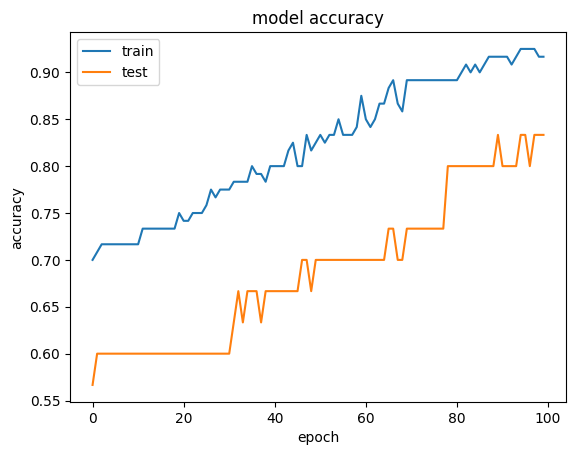

In [ ]:
import matplotlib.pyplot as plt # For graphical representation
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
classifier.save("iris_model.h5")
print("Saved model.")

Saved model.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
Y_pred = classifier.predict(X_test)
y_test_class = np.argmax(Y_test,axis=-1)
y_pred_class = np.argmax(Y_pred,axis=-1)

1/1 [==============================] - 0s 73ms/step


In [ ]:
print(X_test)

     sepallength  sepalwidth  petallength  petalwidth
114          5.8         2.8          5.1         2.4
62           6.0         2.2          4.0         1.0
33           5.5         4.2          1.4         0.2
107          7.3         2.9          6.3         1.8
7            5.0         3.4          1.5         0.2
100          6.3         3.3          6.0         2.5
40           5.0         3.5          1.3         0.3
86           6.7         3.1          4.7         1.5
76           6.8         2.8          4.8         1.4
71           6.1         2.8          4.0         1.3
134          6.1         2.6          5.6         1.4
51           6.4         3.2          4.5         1.5
73           6.1         2.8          4.7         1.2
54           6.5         2.8          4.6         1.5
63           6.1         2.9          4.7         1.4
37           4.9         3.1          1.5         0.1
78           6.0         2.9          4.5         1.5
90           5.5         2.6

In [ ]:
print(Y_pred)

[[1.0161556e-08 1.2530772e-01 8.7469220e-01]
 [2.0167308e-02 6.3329345e-01 3.4653920e-01]
 [8.2238364e-01 1.4432660e-01 3.3289723e-02]
 [4.5845773e-08 1.5672569e-01 8.4327441e-01]
 [8.2238364e-01 1.4432660e-01 3.3289723e-02]
 [7.2249973e-10 8.4327929e-02 9.1567200e-01]
 [8.2238364e-01 1.4432660e-01 3.3289723e-02]
 [1.0647196e-03 5.1533002e-01 4.8360518e-01]
 [5.5174442e-04 4.8627603e-01 5.1317221e-01]
 [1.9472834e-02 6.3202477e-01 3.4850237e-01]
 [2.6099644e-06 2.6995587e-01 7.3004156e-01]
 [2.6792164e-03 5.5568236e-01 4.4163832e-01]
 [1.8484391e-03 5.3965503e-01 4.5849648e-01]
 [4.3672250e-04 4.7558430e-01 5.2397907e-01]
 [5.5052713e-04 4.8573735e-01 5.1371211e-01]
 [8.2238364e-01 1.4432660e-01 3.3289723e-02]
 [5.5287813e-04 4.8574027e-01 5.1370686e-01]
 [1.7088051e-03 5.3580493e-01 4.6248621e-01]
 [8.2238364e-01 1.4432660e-01 3.3289723e-02]
 [8.2238364e-01 1.4432660e-01 3.3289723e-02]
 [6.0035114e-07 2.2253712e-01 7.7746224e-01]
 [4.9807015e-04 4.8085573e-01 5.1864606e-01]
 [8.223836

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_class, y_pred_class)

print(cm)

[[11  0  0]
 [ 0  8  5]
 [ 0  0  6]]


In [ ]:
from numpy import loadtxt
from keras.models import load_model

#load model
model = load_model('iris_model.h5')

#summarize model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
Total params: 55 (220.00 Byte)
Trainable params: 55 (220.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
uploaded = files.upload()
udata = pd.read_csv(io.BytesIO(uploaded['my_unseen_iris.csv']))
print(udata)
X_new = udata.iloc[:, 0:4]


Saving my_unseen_iris.csv to my_unseen_iris.csv
    sepallength  sepalwidth  petallength  petalwidth
0           5.6         3.3          1.3         0.2
1           6.9         3.2          4.4         1.5
2           6.4         3.1          4.5         1.5
3           4.8         3.3          1.5         0.2
4           5.1         3.0          4.1         1.5
5           5.4         3.9          1.7         0.4
6           6.1         3.6          4.5         1.5
7           5.0         3.4          1.4         0.2
8           4.0         2.4          1.8         0.2
9           6.0         3.0          6.1         2.5
10          5.1         2.9          5.3         1.9
11          5.5         3.2          5.1         1.8


In [ ]:
sc = StandardScaler()
X_new = sc.fit_transform(X_new)


In [ ]:
predict_x=model.predict(X_new)
print(predict_x)

1/1 [==============================] - 0s 71ms/step
[[8.2239836e-01 1.4431611e-01 3.3285476e-02]
 [7.9771888e-01 1.6382521e-01 3.8455859e-02]
 [6.0053831e-01 3.1683129e-01 8.2630433e-02]
 [8.2239920e-01 1.4431554e-01 3.3285242e-02]
 [2.4116085e-01 5.6884295e-01 1.8999614e-01]
 [8.2238364e-01 1.4432660e-01 3.3289723e-02]
 [8.2238364e-01 1.4432660e-01 3.3289723e-02]
 [8.2239592e-01 1.4431791e-01 3.3286206e-02]
 [8.2243037e-01 1.4429335e-01 3.3276267e-02]
 [2.4471890e-07 1.9533433e-01 8.0466545e-01]
 [9.1557362e-05 4.0352783e-01 5.9638059e-01]
 [1.7507039e-02 6.2545508e-01 3.5703784e-01]]


In [ ]:
classes_x = (predict_x > 0.5).astype("int32")

for i in range(len(classes_x)):
  print("The label of unsenn data is ", predict_x[i], '\t', classes_x[i])

The label of unsenn data is  [0.82239836 0.1443161  0.03328548] 	 [1 0 0]
The label of unsenn data is  [0.7977189  0.16382521 0.03845586] 	 [1 0 0]
The label of unsenn data is  [0.6005383  0.3168313  0.08263043] 	 [1 0 0]
The label of unsenn data is  [0.8223992  0.14431554 0.03328524] 	 [1 0 0]
The label of unsenn data is  [0.24116085 0.56884295 0.18999614] 	 [0 1 0]
The label of unsenn data is  [0.82238364 0.1443266  0.03328972] 	 [1 0 0]
The label of unsenn data is  [0.82238364 0.1443266  0.03328972] 	 [1 0 0]
The label of unsenn data is  [0.8223959  0.14431791 0.03328621] 	 [1 0 0]
The label of unsenn data is  [0.8224304  0.14429335 0.03327627] 	 [1 0 0]
The label of unsenn data is  [2.4471890e-07 1.9533433e-01 8.0466545e-01] 	 [0 0 1]
The label of unsenn data is  [9.1557362e-05 4.0352783e-01 5.9638059e-01] 	 [0 0 1]
The label of unsenn data is  [0.01750704 0.6254551  0.35703784] 	 [0 1 0]


# Exercise
ทดลองจำแนกข้อมูลธนาคาร เพื่อจำแนกการโกงธนาคาร โดยใช้ชุดข้อมูล churn.csv   
ดูไฟล์ Churn_ANN.ipynb